<a href="https://colab.research.google.com/github/advait-t/Classifying_glasses/blob/main/classifying_glasses_using_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.decomposition import PCA
import glob
from numpy import asarray
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [17]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Making the Dataset, dataset contains 100 images without glasses and 100 with glasses

In [18]:
# cap = cv2.VideoCapture(0)
# count = 0
# while True:

#     ret, frame = cap.read()
#     count += 1
#     face = cv2.resize(frame, (64*64))

#     file_name_path = '/Users/advait_t/Documents/Semester 5/Statistical Methods-2/advait_face/with/' + str(count) + '.jpg'
#     cv2.imwrite(file_name_path, face)

#     cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
#     cv2.imshow('Face Cropper', face)
        
#     if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
#         break
        
# cap.release()
# cv2.destroyAllWindows()      
# print("Collecting Samples Complete")

## Reading the dataset

In [19]:
with_glass = []
c = 0
files = glob.glob ("/content/drive/My Drive/advait_face_64/with/*.jpg")
for myFile in files:
    image = cv2.imread (myFile,0)
    with_glass.append (image)

print('with_glass shape:', np.array(with_glass).shape)

with_glass shape: (100, 64, 64)


In [20]:
without_glass = []
c = 0
files = glob.glob ("/content/drive/My Drive/advait_face_64/without/*.jpg")
for myFile in files:
    image = cv2.imread (myFile,0)
    without_glass.append (image)
print('without_glass shape:', np.array(without_glass).shape)

without_glass shape: (100, 64, 64)


In [21]:
with_glass = np.array(with_glass)
without_glass = np.array(without_glass)
print(with_glass.shape)
print(without_glass.shape)

(100, 64, 64)
(100, 64, 64)


In [22]:
 without_glass_arr = without_glass.reshape(100,64*64)
 without_glass_arr.shape

(100, 4096)

In [23]:
 with_glass_arr = with_glass.reshape(100,64*64)
 with_glass_arr.shape

(100, 4096)

In [24]:
face = np.concatenate((without_glass, with_glass))

In [25]:
face_arr = face.reshape(200,64*64)
print("Shape of the total dataset: ",face_arr.shape)

Shape of the total dataset:  (200, 4096)


In [26]:
yx = (100,1)
yx = np.zeros(yx, dtype=int)
a = (100,1)
a = np.ones(a, dtype=int)
y = np.concatenate((yx,a))
y.shape

(200, 1)

## Scaling face and face_arr

In [27]:
print('Data Type: %s' % face.dtype)
print('Min: %.3f, Max: %.3f' % (face.min(), face.max()))
face_norm_1 = face.astype('float32')
face_norm_1 /= 255.0
print('Min: %.3f, Max: %.3f' % (face_norm_1.min(), face_norm_1.max()))

Data Type: uint8
Min: 1.000, Max: 255.000
Min: 0.004, Max: 1.000


In [28]:
face_norm_1[0]

array([[0.10588235, 0.09803922, 0.10588235, ..., 0.3764706 , 0.3647059 ,
        0.34509805],
       [0.09803922, 0.09019608, 0.11764706, ..., 0.3764706 , 0.36078432,
        0.34509805],
       [0.11372549, 0.10588235, 0.10588235, ..., 0.3764706 , 0.34509805,
        0.3372549 ],
       ...,
       [0.05882353, 0.07843138, 0.07843138, ..., 0.30980393, 0.2901961 ,
        0.29803923],
       [0.05882353, 0.06666667, 0.10980392, ..., 0.29411766, 0.29803923,
        0.2901961 ],
       [0.07450981, 0.0627451 , 0.14901961, ..., 0.26666668, 0.3019608 ,
        0.29803923]], dtype=float32)

In [29]:
print('Data Type: %s' % face.dtype)
print('Min: %.3f, Max: %.3f' % (face_arr.min(), face_arr.max()))
face_norm = face_arr.astype('float32')
face_norm /= 255.0
print('Min: %.3f, Max: %.3f' % (face_norm.min(), face_norm.max()))

Data Type: uint8
Min: 1.000, Max: 255.000
Min: 0.004, Max: 1.000


# Splitting face_norm and face_norm_1 and y into training and testing

In [30]:
x_train_norm_1, x_test_norm_1 = train_test_split(face_norm_1, random_state=0)
print(x_train_norm_1.shape, x_test_norm_1.shape)

(150, 64, 64) (50, 64, 64)


In [31]:
x_train_norm, x_test_norm = train_test_split(face_norm, random_state=0)
print("Train Data Shape:",x_train_norm.shape,"Test Data Shape",x_test_norm.shape)

Train Data Shape: (150, 4096) Test Data Shape (50, 4096)


In [32]:
y_train_norm, y_test_norm = train_test_split(y, random_state = 0)
print(y_train_norm.shape, y_test_norm.shape)

(150, 1) (50, 1)


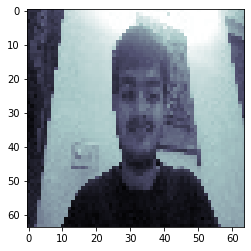

In [33]:
plt.imshow(x_train_norm_1[0],cmap=plt.cm.bone)

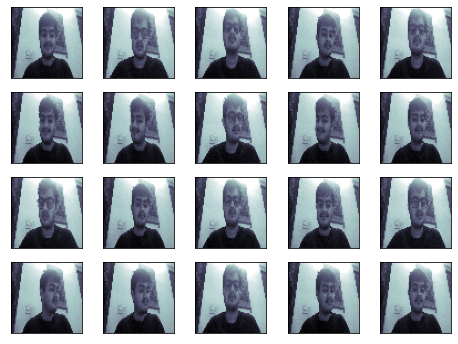

In [34]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train_norm_1[i], cmap=plt.cm.bone)

## Doing the PCA

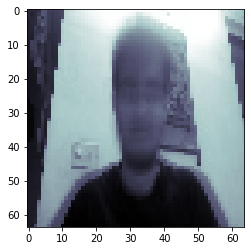

In [35]:
from sklearn.decomposition import PCA
pca1 = PCA() # Enter the number in bracket for the number of eigen faces you want to see
pca1.fit(x_train_norm)
plt.imshow(pca1.mean_.reshape(x_train_norm_1[0].shape),
           cmap=plt.cm.bone)

In [36]:
print("Shape of eigen face:" ,pca1.components_.shape) # This will give the eigen face's shape

Shape of eigen face: (150, 4096)


In [37]:
print(pca1.components_) # This will give us the values of eigen face

[[-0.00575825 -0.00796046 -0.00585124 ... -0.0109339  -0.01138089
  -0.01111022]
 [-0.00495671 -0.00482054 -0.00531779 ... -0.01385091 -0.0137846
  -0.01393266]
 [ 0.00100559 -0.00097125  0.00426598 ...  0.00279423  0.00249189
   0.00135141]
 ...
 [-0.03750722  0.03208746  0.00204626 ...  0.00327238  0.00182797
  -0.0201171 ]
 [-0.02454081 -0.00399115 -0.00555834 ... -0.01218911 -0.00348743
   0.00960968]
 [-0.00750971  0.00010922  0.01336041 ...  0.02748429  0.02330947
   0.01801401]]


In [38]:
print(pca1.explained_variance_) # this will give us the eigen values

[9.1654415e+00 5.4649940e+00 1.4323586e+00 9.4583213e-01 6.1204380e-01
 5.1090473e-01 3.6543393e-01 3.3823085e-01 2.5755340e-01 1.9544001e-01
 1.7877682e-01 1.2263359e-01 1.0863839e-01 8.9792706e-02 7.8938141e-02
 6.7553103e-02 6.1455298e-02 5.4561954e-02 4.8328709e-02 4.5961294e-02
 4.5360032e-02 3.8867202e-02 3.5920568e-02 3.4369793e-02 3.1839117e-02
 2.8973369e-02 2.8520612e-02 2.6309915e-02 2.3703463e-02 2.3214500e-02
 2.2142015e-02 2.1257989e-02 1.9837176e-02 1.8768270e-02 1.8441334e-02
 1.6651757e-02 1.5426968e-02 1.5227260e-02 1.4740219e-02 1.4221028e-02
 1.4039565e-02 1.3542430e-02 1.3191757e-02 1.2851525e-02 1.2460018e-02
 1.2100410e-02 1.1353604e-02 1.1127783e-02 1.0512403e-02 1.0176372e-02
 9.7554009e-03 9.5744440e-03 9.2635686e-03 8.9775389e-03 8.5534696e-03
 8.3411280e-03 8.0474438e-03 7.9278369e-03 7.8624533e-03 7.5661880e-03
 7.3173046e-03 7.1913190e-03 6.9781654e-03 6.8820957e-03 6.7969915e-03
 6.6210297e-03 6.4650592e-03 6.3379481e-03 6.1631445e-03 6.1173122e-03
 6.027

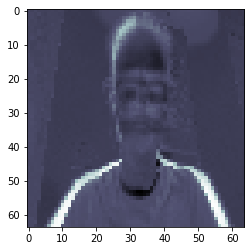

In [39]:
plt.imshow(pca1.components_[0].reshape(64,64),cmap=plt.cm.bone) # this is the eigen face

In [40]:
omega = pca1.fit_transform(x_train_norm)  #omega shows us the image from the reduced dimensions which is (200,200) in this case (no_of_dimensions,no_of_images)
omega.shape

(150, 150)

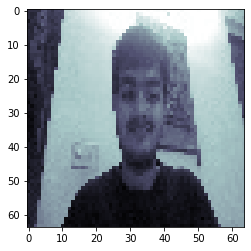

In [41]:
inv_proj3 = pca1.inverse_transform(omega)
plt.imshow(inv_proj3[0].reshape(64,64),cmap=plt.cm.bone)

In [42]:
pca = pca1.components_

In [43]:
x_train_pca = pca1.transform(x_train_norm)

In [44]:
x_test_pca = pca1.transform(x_test_norm)

In [45]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(150, 150)
(50, 150)


## Trying Neural Networks

In [46]:
nn = models.Sequential()

In [47]:
nn.add(layers.Dense(512, activation='relu', input_shape = (150,)))
nn.add(layers.Dense(256, activation='relu'))
nn.add(layers.Dense(128, activation='relu'))
nn.add(layers.Dense(64, activation='relu'))
nn.add(layers.Dense(1, activation = 'sigmoid'))
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               77312     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 249,857
Trainable params: 249,857
Non-trainable params: 0
_________________________________________________________________


In [48]:
import time
nn.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
a = time.time()
nn.fit(x_train_pca, y_train_norm,batch_size=128, epochs= 1000)
b = time.time()

Epoch 1/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5333
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.2451 - accuracy: 0.9933
Epoch 3/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.1096 - accuracy: 0.9933
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9933
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9933
Epoch 6/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0450 - accuracy: 0.9933
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.9933
Epoch 8/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 10/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9933
Epoch 11/1000
2/2 [

In [49]:
test_loss, test_acc = nn.evaluate(x_test_pca, y_test_norm)
print("Loss:",test_loss)
print("Accuracy:",str(test_acc*100)+"%")
print("Time Taken for all Epochs to run with PCA reduced dimension and NN: ",(b-a),"s")

2/2 [==============================] - 0s 2ms/step - loss: 4.0481e-09 - accuracy: 1.0000
Loss: 4.048073432016963e-09
Accuracy: 100.0%
Time Taken for all Epochs to run with PCA reduced dimension and NN:  35.4661922454834 s


In [50]:
import tensorflow as tf

from keras.models import load_model

# nn.save('/content/drive/My Drive/pca_nn_glasses1.h5')

# Trying on a new Image

In [51]:
model = load_model('/content/drive/My Drive/pca_nn_glasses.h5')

In [52]:
image_arr = cv2.imread('/content/drive/My Drive/advait_face_64/with/1.jpg',0)
print(image_arr.shape)

(64, 64)


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
image_arr.resize(1,64*64)
image = image_arr.reshape(64,64)
print(image.shape)
print(image_arr.shape)

(64, 64)
(1, 4096)


In [57]:
print('Data Type: %s' % image.dtype)
print('Min: %.3f, Max: %.3f' % (image.min(), image.max()))
image_norm = image.astype('float32')
image_norm /= 255.0
print('Min: %.3f, Max: %.3f' % (image_norm.min(), image_norm.max()))

Data Type: uint8
Min: 2.000, Max: 196.000
Min: 0.008, Max: 0.769


In [58]:
print('Data Type: %s' % image_arr.dtype)
print('Min: %.3f, Max: %.3f' % (image_arr.min(), image_arr.max()))
image_norm_1 = image_arr.astype('float32')
image_norm_1 /= 255.0
print('Min: %.3f, Max: %.3f' % (image_norm_1.min(), image_norm_1.max()))

Data Type: uint8
Min: 2.000, Max: 196.000
Min: 0.008, Max: 0.769


In [59]:
image_norm_1.shape

(1, 4096)

In [60]:
trial_pca = pca1.transform(image_norm_1)

In [61]:
trial_pca.shape

(1, 150)

In [63]:
pred = model.predict_classes(trial_pca)
if pred==1:
  print("Wearing Glasses")
else:
  print("Not wearing Glasses")

Wearing Glasses
